**LSTM Model**

In [ ]:
#Read the Dataset
import pandas as pd
data=pd.read_csv("/content/sample_data/Data_for_UCI_named.csv")
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
#Check any null values present in the dataset or not
data.isnull().sum()

,0
tau1,0
tau2,0
tau3,0
tau4,0
p1,0
p2,0
p3,0
p4,0
g1,0
g2,0


In [ ]:
#Data Preprocessing
X=data.drop(["stab","stabf"],axis=1)
y=data["stabf"]

In [ ]:
#Label Encoding and MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
y=encoder.fit_transform(y)
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [ ]:
#Splitting the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
#LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))
model = Sequential([
        LSTM(64, return_sequences=True, activation='relu'),
        LSTM(64, return_sequences=False),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.1),
        Dense(1, activation='sigmoid')
    ])
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1, validation_split=0.2)

Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6331 - loss: 0.6487 - val_accuracy: 0.8050 - val_loss: 0.4707
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8090 - loss: 0.4178 - val_accuracy: 0.8300 - val_loss: 0.3712
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8469 - loss: 0.3413 - val_accuracy: 0.8444 - val_loss: 0.3287
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8798 - loss: 0.2810 - val_accuracy: 0.8875 - val_loss: 0.2710
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9019 - loss: 0.2199 - val_accuracy: 0.8775 - val_loss: 0.2619
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9123 - loss: 0.2026 - val_accuracy: 0.9281 - val_loss: 0.1888
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9307 - loss: 0.1657 - val_accuracy: 0.9312 - val_loss: 0.1789
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9340 - loss: 0.1611 - val_accuracy: 0

In [ ]:
#Evaluate the model
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred)*100)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       712
           1       0.95      0.98      0.96      1288

    accuracy                           0.95      2000
   macro avg       0.95      0.94      0.95      2000
weighted avg       0.95      0.95      0.95      2000

Accuracy: 95.05


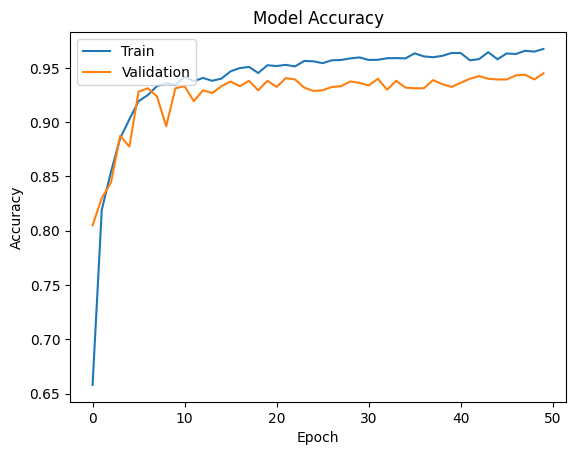

In [ ]:
#Plotting the accu and acc_val
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Text(50.722222222222214, 0.5, 'Actual')

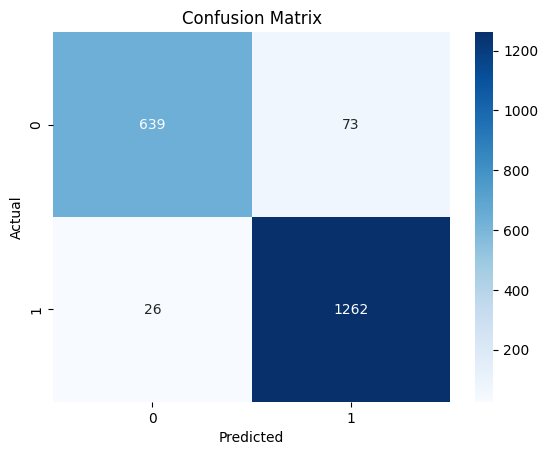

In [ ]:
#confusion matrix plotting
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


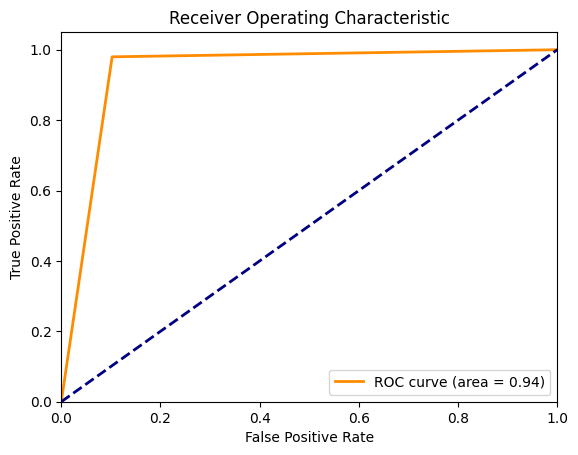

In [ ]:
#ROC Curve for lsmt
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()